In [1]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Содержание

* [1 Исследование входных данных](#chapter1)
    * [1.1 Датасет *Predicting Heart Disease Risk Using Clinical Variables*](#section_1_1)
        * [1.1.1 Описание переменных](#sub_section_1_1_1)
        * [1.1.2 Обзор датасета](#sub_section_1_1_2)
    * [1.2 Датасет *Cleveland Clinic Heart Disease Dataset*](#section_1_2)
        * [1.2.1 Описание переменных](#sub_section_1_2_1)
        * [1.2.2 Обзор датасета](#sub_section_1_2_2)
* [2 Определение функций моделирования пропусков](#chapter2)
    * [2.1 MCAR](#section_2_1)
    * [2.2 MAR](#section_2_2)
    * [2.3 MNAR](#section_2_3)
    * [2.4 Функция создания набора датасетов с пропусками в каждой переменной](#section_2_4)
* [3 Определение функций для импутации](#chapter3)
    * [3.1 Создание 2 тестовых датасетов (Потом уберу)](#section_3_1)
    * [3.2 Импутация средним](#section_3_2)
    * [3.3 Линейная регрессия](#section_3_3)
    * [3.4 k-ближайших соседей (kNN)](#section_3_4)
    * [3.5 Решающие деревья для классификации](#section_3_5)
    * [3.6 Решающие деревья для регрессии](#section_3_6)
* [4 Создание набора датасетов](#chapter4)
    * [4.1 Датасет *Predicting Heart Disease Risk Using Clinical Variables*](#section_4_1)
    * [4.2 Датасет *Cleveland Clinic Heart Disease Dataset*](#section_4_2)
* [5 Применение методов](#chapter5)
    * [5.1 Определение функции для применения методов](#section_5_1)
    * [5.2 Датасет *Predicting Heart Disease Risk Using Clinical Variables*](#section_5_2)
    * [5.3 Датасет *Cleveland Clinic Heart Disease Dataset*](#section_5_3)
* [6 Сравнение результатов](#chapter6)
    * [6.1 Ad-hoc сравнение на 2 датасетах](#section_6_1)
        * [6.1.1 Численная переменная](#sub_section_6_1_1)
        * [6.1.2 Категориальная переменная](#sub_section_6_1_2)
    * [6.2 Создание матриц метрик и определение функции поиска лучших показателей](#section_6_2)
    * [6.3 Датасет *Predicting Heart Disease Risk Using Clinical Variables*](#section_6_3)
    * [6.4 Датасет *Cleveland Clinic Heart Disease Dataset*](#section_6_4)
* [7 Выводы](#chapter7)

# 1 Исследование исходных данных <a class="anchor" id="chapter1"></a>

## 1.1 Датасет *Predicting Heart Disease Risk Using Clinical Variables* <a class="anchor" id="section_1_1"></a>

### 1.1.1 Описание переменных  <a class="anchor" id="sub_section_1_1_1"></a>
|Column name            |Description                                                      |Type             |
|-----------------------|-----------------------------------------------------------------|-----------------|
|Age                    |The age of the patient.                                          |Numeric          |
|Sex                    |The gender of the patient.                                       |Categorical (Bin)|
|Chest pain type        |The type of chest pain experienced by the patient.               |Categorical      |
|BP                     |The blood pressure level of the patient.                         |Numeric          |
|Cholesterol            |The cholesterol level of the patient.                            |Numeric          |
|FBS over 120           |The fasting blood sugar test results over 120 mg/dl.             |Categorical (Bin)|
|EKG results            |The electrocardiogram results of the patient.                    |Categorical      |
|Max HR                 |The maximum heart rate levels achieved during exercise testing.  |Numeric          |
|Exercise angina        |The angina experienced during exercise testing.                  |Categorical (Bin)|
|ST depression          |The ST depression on an Electrocardiogram.                       |Numeric          |
|Slope of ST            |The slope of ST segment electrocardiogram readings.              |Categorical      |
|Number of vessels fluro|The amount vessels seen in Fluoroscopy images.                   |Numeric          |
|Thallium               |The Thallium Stress test findings.                               |Categorical      |
|Heart Disease          |Whether or not the patient has been diagnosed with Heart Disease.|Categorical (Bin)|

НАДО УБРАТЬ ПРОБЕЛЫ ИЗ НАЗВАНИЙ ПЕРЕМЕННЫХ

### 1.1.2 Обзор датасета <a class="anchor" id="sub_section_1_1_2"></a>

In [2]:
phd_data = pd.read_csv('../../ВКР/Datasets/Heart_Disease_Prediction.csv', index_col='index')
phd_data.head(6)

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
index,,,,,,,,,,,,,,
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
5,65,1,4,120,177,0,0,140,0,0.4,1,0,7,Absence


In [3]:
phd_data.replace({'Presence': 1, 'Absence': 0}, inplace=True)

In [4]:
phd_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    int64  
dtypes: float64(1), int64(13)
m

In [5]:
phd_data.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,0.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,1.000000


In [6]:
phd_data.shape

(270, 14)

<AxesSubplot:>

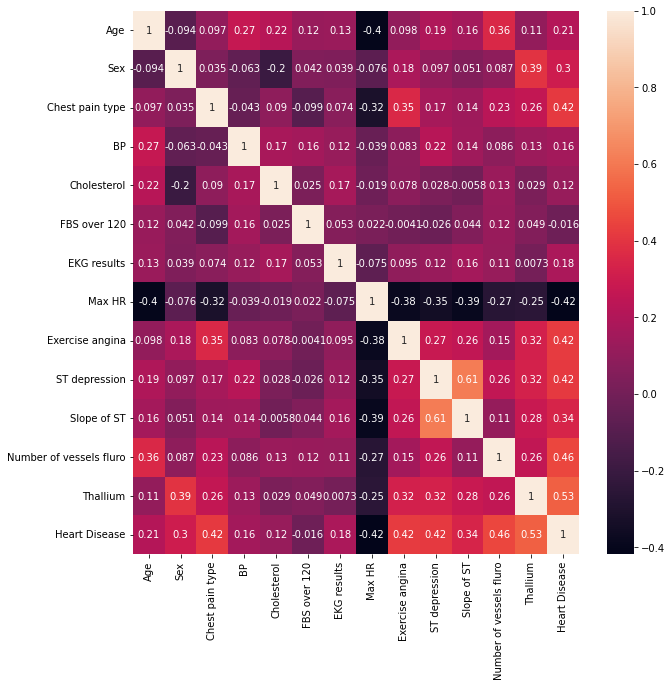

In [7]:
plt.figure(figsize=(10, 10))
sns.heatmap(phd_data.corr(), annot=True)

In [8]:
phd_data.corr().sum()

Age                        2.471848
Sex                        1.784761
Chest pain type            2.400219
BP                         2.394075
Cholesterol                1.829586
FBS over 120               1.495045
EKG results                2.183973
Max HR                    -1.959862
Exercise angina            2.927466
ST depression              3.336540
Slope of ST                2.898190
Number of vessels fluro    3.082684
Thallium                   3.433992
Heart Disease              4.103383
dtype: float64

In [9]:
phd_data['Heart Disease'].describe()

count    270.000000
mean       0.444444
std        0.497827
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Heart Disease, dtype: float64

In [10]:
len(phd_data[phd_data['Heart Disease'] == 1]) / 270 * 100

44.44444444444444

## 1.2 Датасет *Cleveland Clinic Heart Disease Dataset* <a class="anchor" id="section_1_2"></a>

### 1.2.1 Описание переменных <a class="anchor" id="sub_section_1_2_1"></a>
|Column name|Description                                                                                              |Type|
|-----------|--------------------------------------------------------------------------------------------------------------|-----------------|
|age        |age in years                                                                                                  |Numeric          |
|sex        |sex (1 = male; 0 = female)                                                                                    |Categorical (Bin)|
|cp         |chest pain type (1: typical angina; 2: atypical angina; 3: non-anginal pain; 4: asymptomatic)                 |Categorical      |
|trestbps   |resting blood pressure (in mm Hg on admission to the hospital)                                                |Numeric          |
|chol       |serum cholestoral in mg/dl                                                                                    |Numeric          |
|fbs        |fasting blood sugar > 120 mg/dl (1 = true; 0 = false)                                                         |Categorical (Bin)|
|restecg    |resting electrocardiographic results (0: normal; 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV); 2: showing probable or definite left ventricular hypertrophy by Estes' criteria)    |Categorical      |
|thalach    |maximum heart rate achieved                                                                                   |Numeric          |
|exang      |exercise induced angina (1 = yes; 0 = no)                                                                     |Categorical (Bin)|
|oldpeak    |ST depression induced by exercise relative to rest                                                            |Numeric          |
|slope      |the slope of the peak exercise ST segment (1: upsloping 2: flat 3: downsloping)                               |Categorical      |
|ca         |number of major vessels (0-3) colored by flourosopy (for calcification of vessels)                            |Categorical      |
|thal       |results of nuclear stress test (3 = normal; 6 = fixed defect; 7 = reversable defect)                          |Categorical      |
|num        |target variable representing diagnosis of heart disease (angiographic disease status) in any major vessel (0: < 50% diameter narrowing; 1-4: > 50% diameter narrowing)                                                                     |Categorical    |

### 1.2.2 Обзор датасета <a class="anchor" id="sub_section_1_2_2"></a>

In [11]:
cchd_data = pd.read_csv('../../ВКР/Datasets/processed_cleveland.csv')
cchd_data.head(6)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
5,56,1,2,120,236,0,0,178,0,0.8,1,0,3,0


In [12]:
cchd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 33.3+ KB


In [13]:
cchd_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


Заменим '?' на моду. Если это были пропуски, то их количество составляло незначительно.  
Также приведем типы колонок с '?' к int64, чтобы их можно было использовать в дальнейших вычислениях.

In [14]:
len(cchd_data.loc[cchd_data['ca'] == '?', 'ca'])

4

In [15]:
len(cchd_data.loc[cchd_data['thal'] == '?', 'thal'])

2

In [16]:
cchd_data.loc[cchd_data['ca'] == '?', 'ca'] = cchd_data['ca'].mode().iloc[0]

In [17]:
cchd_data.loc[cchd_data['thal'] == '?', 'thal'] = cchd_data['thal'].mode().iloc[0]

In [18]:
cchd_data = cchd_data.astype({'ca':'int64', 'thal': 'int64'})

In [19]:
cchd_data.shape

(303, 14)

<AxesSubplot:>

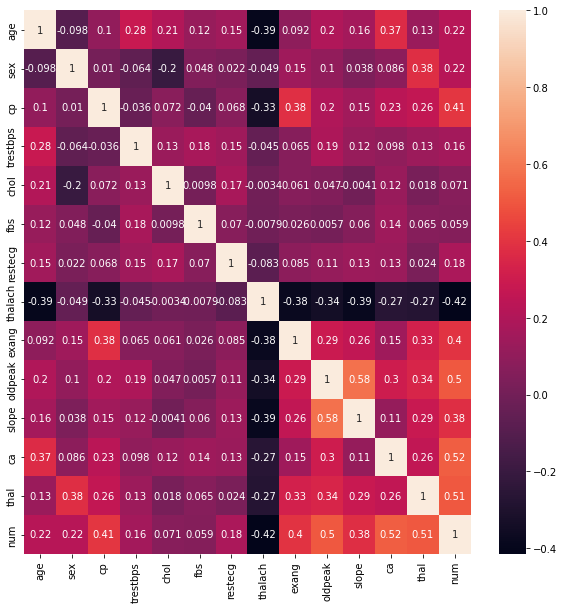

In [20]:
plt.figure(figsize=(10, 10))
sns.heatmap(cchd_data.corr(), annot=True)

In [21]:
cchd_data.corr().sum()

age         2.547800
sex         1.646021
cp          2.484241
trestbps    2.352104
chol        1.705724
fbs         1.729190
restecg     2.214514
thalach    -1.978588
exang       2.894480
oldpeak     3.534107
slope       2.883748
ca          3.246629
thal        3.455594
num         4.218131
dtype: float64

In [22]:
len(cchd_data[cchd_data['num'] == 0])

164

In [23]:
164/303 * 100

54.12541254125413

# 2 Определение функций моделирования пропусков <a class="anchor" id="chapter2"></a>

## 2.1 MCAR <a class="anchor" id="section_2_1"></a>

In [24]:
def replace_random_elements(array, n):
    flat_array = array.flatten()  # делаем одномерный массив из двумерного
    indices = np.random.choice(flat_array.size, n, replace=False)  # выбираем случайные индексы
    flat_array[indices] = 1  # заменяем выбранные элементы на 1
    return flat_array.reshape(array.shape)  # возвращаем двумерный массив

In [25]:
def make_mcar(dataset, area='All', miss_percent=5):
    '''
    dataset - исходный набор данных в виде pandas dataframe
    area='All' - аргумент, принимающий наименование одного из столбцов dataset в виде строки. В случае, если не указан, пропуски моделируются во всем датасете
    miss_percent=5 - процент моделируемых пропусков в указанной области в виде числа
    '''
    dataset = dataset.copy()
    if area == 'All':
        elements_number = dataset.shape[0] * dataset.shape[1]
        missing_elements_number = round(miss_percent * elements_number / 100)
        real_miss_percent = missing_elements_number / elements_number * 100 # может не равняться miss_percent, т.к. нужно целое кол-во элементов
        
        data_missing_indicator = np.zeros(dataset.shape) # массив индикаторов размером dataset'a
        data_missing_indicator = replace_random_elements(data_missing_indicator, missing_elements_number)
        
        dataset[data_missing_indicator == 1] = np.nan        
    else:
        elements_number = dataset.shape[0]
        missing_elements_number = round(miss_percent * elements_number / 100)
        real_miss_percent = missing_elements_number / elements_number * 100 # может не равняться miss_percent, т.к. нужно целое кол-во элементов
        
        data_missing_indicator = np.zeros(dataset.shape[0]) # массив индикаторов размером dataset'a
        data_missing_indicator = replace_random_elements(data_missing_indicator, missing_elements_number)
        
        dataset.loc[data_missing_indicator == 1, area] = np.nan
        
    print( "'" + area + "'", str(miss_percent) + '%', str(round(real_miss_percent, 3)) + '%', sep='; ', end='.\n')    
    
    return dataset

In [26]:
# Проверка
make_mcar(phd_data, area='All', miss_percent=40)

'All'; 40%; 40.0%.


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
index,,,,,,,,,,,,,,
0,70.0,NaN,NaN,NaN,NaN,NaN,2.0,109.0,NaN,2.4,2.0,3.0,NaN,NaN
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,NaN,NaN,0.0
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,NaN,0.3,NaN,0.0,7.0,NaN
3,NaN,1.0,4.0,128.0,263.0,0.0,0.0,105.0,NaN,0.2,NaN,1.0,7.0,0.0
4,NaN,0.0,2.0,NaN,NaN,NaN,2.0,121.0,1.0,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.5,NaN,0.0,7.0,0.0
266,44.0,1.0,NaN,120.0,NaN,0.0,0.0,173.0,NaN,0.0,NaN,0.0,7.0,0.0
267,NaN,NaN,2.0,NaN,294.0,NaN,2.0,153.0,NaN,1.3,2.0,0.0,3.0,0.0


## 2.2 MAR <a class="anchor" id="section_2_2"></a>

СТОИТ РАССМОТРЕТЬ ИСПОЛЬЗОВАНИЕ НЕ miss_parameter, А miss_percent для MAR и MNAR пропусков 

In [27]:
def add_missing(x, area, p_miss):
    if pd.isna(x[area]):
        return x[area]
    else:
        return np.random.choice([x[area], np.nan], p=[1-p_miss[x.name], p_miss[x.name]])

In [28]:
def make_mar(dataset, area, area_dependent, ascending=False, miss_parameter=5):
    '''
    dataset - исходный набор данных в виде pandas dataframe
    area - аргумент, принимающий наименование одного из столбцов dataset в виде строки, в данном столбце будут созданы пропуски
    area_dependent - аргумент, принимающий наименование одного из столбцов dataset в виде строки, от значений в этом столбце будут зависеть вероятности пропусков в столбце area
    ascending=False - если False, то чем больше значение элемента, тем больше вероятность пропуска
    miss_parameter=5 - параметр, применяемый при составлении вектора индикаторов пропусков
    '''
    dataset = dataset.copy()
    
    elements_number = dataset.shape[0]
    data_missing_indicator = np.zeros(dataset.shape[0])
    
    if ascending:
        p_miss = dataset[area_dependent].apply(lambda x: (1 - x / dataset[area_dependent].max()) * miss_parameter / 100)
    else:
        p_miss = dataset[area_dependent].apply(lambda x: x / dataset[area_dependent].max() * miss_parameter / 100)
    
    dataset[area] = dataset.apply(lambda x: add_missing(x, area, p_miss), axis=1)
    
    real_miss_percent = len(dataset[dataset[area].isna()]) / elements_number * 100
    print( "'" + area + "'", "'" + area_dependent + "'", miss_parameter, str(round(real_miss_percent, 3)) + '%', sep='; ', end='.\n')    
 
    return dataset

In [29]:
cchd_data['ca'].max()

3

In [30]:
# Проверка
make_mar(cchd_data, area='thal', area_dependent='ca', miss_parameter=5)

'thal'; 'ca'; 5; 0.33%.


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7.0,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7.0,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3.0,1


## 2.3 MNAR <a class="anchor" id="section_2_3"></a>

In [31]:
def make_mnar(dataset, area, ascending=False, miss_parameter=5):
    '''
    dataset - исходный набор данных в виде pandas dataframe
    area - аргумент, принимающий наименование одного из столбцов dataset в виде строки
    ascending=False - если False, то чем больше значение элемента, тем больше вероятность пропуска
    miss_parameter=5 - параметр, применяемый при составлении вектора индикаторов пропусков
    '''
    dataset = dataset.copy()
    
    elements_number = dataset.shape[0]
    data_missing_indicator = np.zeros(dataset.shape[0])
    
    if ascending:
        p_miss = dataset[area].apply(lambda x: (1 - x / dataset[area].max()) * miss_parameter / 100)
    else:
        p_miss = dataset[area].apply(lambda x: x / dataset[area].max() * miss_parameter / 100)
    
    dataset[area] = dataset.apply(lambda x: add_missing(x, area, p_miss), axis=1)
    
    real_miss_percent = len(dataset[dataset[area].isna()]) / elements_number * 100
    print( "'" + area + "'", miss_parameter, str(round(real_miss_percent, 3)) + '%', sep='; ', end='.\n')    
    return dataset

In [32]:
# Проверка
make_mnar(phd_data, area='Chest pain type', ascending=False, miss_parameter=75)

'Chest pain type'; 75; 59.63%.


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
index,,,,,,,,,,,,,,
0,70,1,NaN,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,NaN,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2.0,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,NaN,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2.0,120,269,0,2,121,1,0.2,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3.0,172,199,1,0,162,0,0.5,1,0,7,0
266,44,1,2.0,120,263,0,0,173,0,0.0,1,0,7,0
267,56,0,NaN,140,294,0,2,153,0,1.3,2,0,3,0


## 2.4 Функция создания набора датасетов с пропусками в каждой переменной <a class="anchor" id="section_2_4"></a>

Определим функции таким образом, чтобы каждая из них создавала *c* датасетов для данного механизма пропуска, где *c* - количество переменных-столбцов в принимаемом функцией датасете.  
Создание пропусков MCAR во всем датасете пока игнорируем.

In [33]:
def make_set_of_datasets(dataset, mechanism, name='', miss_parameters=[5, 20, 60]):
    '''
    dataset - исходный набор данных в виде pandas dataframe
    mechanism - механизм пропусков, допускаемых в данном наборе датасетов. Может принимать значение: MCAR, MAR или MNAR
    name='' - название ключей словаря с набором датасетов
    miss_parameters=[5, 20, 60] - список параметров пропуска, принимает 3 параметра, означающих примерные доли пропусков в результирующих наборах
    '''
    dataset = dataset.copy()
    c = dataset.shape[1] # количество переменных в датасете
    df_sets = [] # список словарей
    
    for i in range(3): # создаем 3 набора датасетов, соответственно заданным параметрам пропусков
        df_set = {} # словарь для c датасетов
        keys_set = [f'{name}_{mechanism}{miss_parameters[i]}_{dataset.columns[j]}' for j in range(0, c)] # создаем список ключей для получаемых датафреймов
        for j in range(c): # создаем c датафреймов с пропусками
            if mechanism == 'MCAR':
                df_set[keys_set[j]] = make_mcar(dataset, area=dataset.columns[j], miss_percent=miss_parameters[i])
            elif mechanism == 'MAR':
                df_set[keys_set[j]] = make_mar(dataset, area=dataset.columns[j], area_dependent=dataset.columns[(j - 1) % c], miss_parameter=miss_parameters[i])
            elif mechanism == 'MNAR':
                df_set[keys_set[j]] = make_mnar(dataset, area=dataset.columns[j], miss_parameter=miss_parameters[i])
            else:
                print('Ошибка в названии механизма пропуска')
                return None
        df_sets.append(df_set) # добавляем словарь в список
    return df_sets

In [34]:
test_set = make_set_of_datasets(phd_data, 'MCAR', 'phd_data', miss_parameters=[5, 20, 60])

'Age'; 5%; 5.185%.
'Sex'; 5%; 5.185%.
'Chest pain type'; 5%; 5.185%.
'BP'; 5%; 5.185%.
'Cholesterol'; 5%; 5.185%.
'FBS over 120'; 5%; 5.185%.
'EKG results'; 5%; 5.185%.
'Max HR'; 5%; 5.185%.
'Exercise angina'; 5%; 5.185%.
'ST depression'; 5%; 5.185%.
'Slope of ST'; 5%; 5.185%.
'Number of vessels fluro'; 5%; 5.185%.
'Thallium'; 5%; 5.185%.
'Heart Disease'; 5%; 5.185%.
'Age'; 20%; 20.0%.
'Sex'; 20%; 20.0%.
'Chest pain type'; 20%; 20.0%.
'BP'; 20%; 20.0%.
'Cholesterol'; 20%; 20.0%.
'FBS over 120'; 20%; 20.0%.
'EKG results'; 20%; 20.0%.
'Max HR'; 20%; 20.0%.
'Exercise angina'; 20%; 20.0%.
'ST depression'; 20%; 20.0%.
'Slope of ST'; 20%; 20.0%.
'Number of vessels fluro'; 20%; 20.0%.
'Thallium'; 20%; 20.0%.
'Heart Disease'; 20%; 20.0%.
'Age'; 60%; 60.0%.
'Sex'; 60%; 60.0%.
'Chest pain type'; 60%; 60.0%.
'BP'; 60%; 60.0%.
'Cholesterol'; 60%; 60.0%.
'FBS over 120'; 60%; 60.0%.
'EKG results'; 60%; 60.0%.
'Max HR'; 60%; 60.0%.
'Exercise angina'; 60%; 60.0%.
'ST depression'; 60%; 60.0%.
'Slope of

In [35]:
test_set[2]['phd_data_MCAR60_Age']

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
index,,,,,,,,,,,,,,
0,NaN,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67.0,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57.0,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,NaN,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74.0,0,2,120,269,0,2,121,1,0.2,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,NaN,1,3,172,199,1,0,162,0,0.5,1,0,7,0
266,NaN,1,2,120,263,0,0,173,0,0.0,1,0,7,0
267,56.0,0,2,140,294,0,2,153,0,1.3,2,0,3,0


# 3 Определение функций для импутации <a class="anchor" id="chapter3"></a>

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## 3.1 Создание 2 тестовых датасетов (потом уберу) <a class="anchor" id="section_3_1"></a>

In [37]:
phd_mar_num20_test = make_mar(phd_data, area='Max HR', area_dependent='Age', miss_parameter=20)
# вектор истинных значений
num_test_mask_null = phd_mar_num20_test['Max HR'].isnull()
num_true = np.array(phd_data.loc[num_test_mask_null == True, 'Max HR']).reshape(-1, 1) # берем только те строки, в которых в column пропуск
print('num_true.shape:', num_true.shape, end='\n\n')


phd_mar_cat20_test = make_mar(phd_data, area='Heart Disease', area_dependent='Max HR', miss_parameter=20)
# вектор истинных значений
cat_test_mask_null = phd_mar_cat20_test['Heart Disease'].isnull()
cat_true = np.array(phd_data.loc[cat_test_mask_null == True, 'Heart Disease']).reshape(-1, 1) # берем только те строки, в которых в column пропуск
print('cat_true.shape:', cat_true.shape)

'Max HR'; 'Age'; 20; 13.704%.
num_true.shape: (37, 1)

'Heart Disease'; 'Max HR'; 20; 12.593%.
cat_true.shape: (34, 1)


## 3.2 Импутация средним <a class="anchor" id="section_3_2"></a>

In [38]:
def impute_average(dataset, column, mode='median', standard_deviation=False):
    '''
    dataset - исходный набор данных в виде pandas dataframe
    column - столбец, подлежащий восстановлению
    mode='median' - значение, которым восстанавливается столбец, также есть варианты mean, mode
    standard_deviation=False - добавление случайных чисел в пределах стандартного отклонения в массив импутируемых значений
    '''
    dataset = dataset.copy()
    dataset_col = dataset.loc[:, column]
    if mode == 'median':
        imputed_value = dataset_col.median()
    elif mode == 'mean':
        imputed_value = round(dataset_col.mean(), 1)
    elif mode == 'mode':
        imputed_value = dataset_col.mode().iloc[0]
    print('Значение для импутации:', imputed_value)
    
    predict_vector = np.array([imputed_value for i in range(dataset[column].isna().sum())])
    
    if not standard_deviation:
        dataset[column] = dataset[column].fillna(value=imputed_value)
    else:
        std = dataset[column].std()
        # rand(-std, std)
    return dataset, predict_vector

In [39]:
# Восстанавливаем численную переменную медианой
phd_mar_num20_test_imputed, median_pred = impute_average(phd_mar_num20_test, 'Max HR', mode='median')
median_pred.shape

Значение для импутации: 152.0


(37,)

In [40]:
# Восстанавливаем численную переменную арифметическим средним
phd_mar_num20_test_imputed, mean_pred = impute_average(phd_mar_num20_test, 'Max HR', mode='mean')
mean_pred.shape

Значение для импутации: 149.3


(37,)

In [41]:
# Восстанавливаем категориальную переменную модой
phd_mar_cat20_test_imputed, mode_pred = impute_average(phd_mar_cat20_test, 'Heart Disease', mode='mode')
mode_pred.shape

Значение для импутации: 0.0


(34,)

<AxesSubplot:xlabel='Max HR', ylabel='count'>

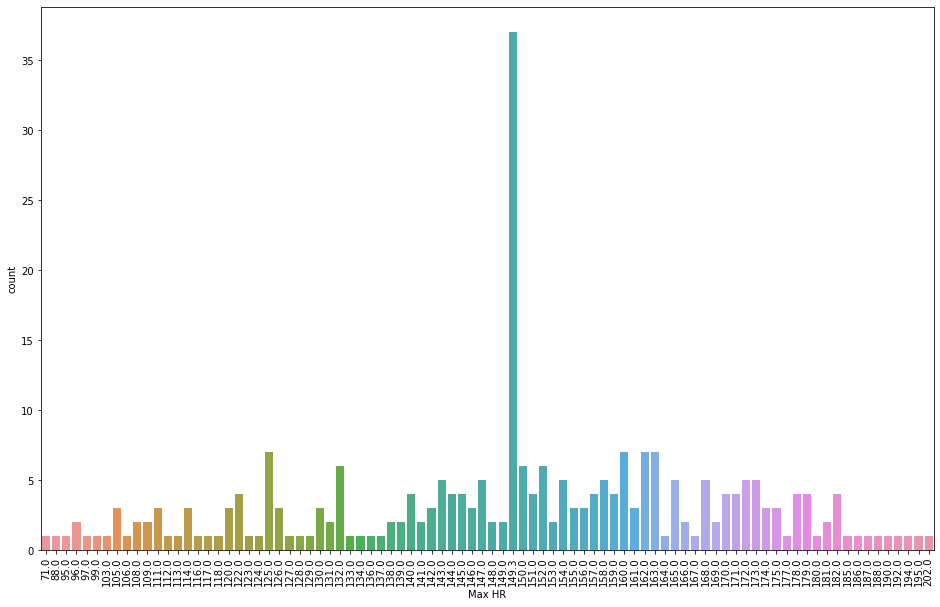

In [42]:
# поворачиваем лейблы оси x на 90 градусов
plt.figure(figsize=(16, 10))
plt.xticks(rotation=90)
sns.countplot(data=phd_mar_num20_test_imputed, x='Max HR')

## 3.3 Линейная регрессия <a class="anchor" id="section_3_3"></a>

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Для обучения и тестирования модели лин. регрессии берем исключительно строки без пропуска в целевой переменной.  
Несмотря на то, что исходный датасет не содержит пропусков, и нам известны все значения переменных, в "боевых" условиях у исследователя такой привелегии нет. 

In [44]:
def impute_linreg(dataset, column, excluded_columns=[]):
    '''
    dataset - исходный набор данных в виде pandas dataframe
    column - столбец, подлежащий восстановлению
    excluded_columns=[] - список колонок, не используемых в обучении
    '''
    dataset = dataset.copy()
    mask_notnull = dataset[column].notnull()
    full_data = dataset.loc[mask_notnull == True, :] # берем только те строки, в которых в column нет пропуска
    y = np.array(full_data.loc[:, column]).reshape(-1, 1)
    
    excluded_columns.append(column)
    x = np.array(full_data.loc[:, ~full_data.columns.isin(excluded_columns)])
    
    missing_data = dataset.loc[mask_notnull == False, :]
    x_pred = np.array(missing_data.loc[:, ~full_data.columns.isin(excluded_columns)])
    
    scaler = StandardScaler()
    
    x = scaler.fit_transform(x)
    x_pred = scaler.fit_transform(x_pred)
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)
        
    reg = LinearRegression()
    reg.fit(x_train, y_train)
    print('Показатели модели:', reg.coef_, reg.intercept_, sep='\n', end='\n\n')
    print(reg.score(x_train, y_train), reg.score(x_test, y_test), sep='\n')
    
    predict_vector = reg.predict(x_pred)
    
    # косая замена pd.fillna()
    miss_n = 0
    for i in range(dataset.shape[0]):
        if pd.isna(dataset.loc[i, column]):
            dataset.loc[i, column] = predict_vector[miss_n]
            miss_n += 1
            
    return dataset, predict_vector

In [45]:
# предикт регрессией
df, reg_pred = impute_linreg(phd_mar_num20_test, 'Max HR') # df - пустышка
reg_pred.shape

Показатели модели:
[[-8.60797404 -0.0116991  -2.83612731  4.58641891  2.36460493  0.15296619
   0.37770794 -6.26557948  0.86926032 -4.67259815 -0.65918572  1.3227241
  -4.69327308]]
[149.64089087]

0.4384348801385295
0.40269724207994373


(37, 1)

## 3.4 k-ближайших соседей (kNN) <a class="anchor" id="section_3_4"></a>

In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

In [47]:
def impute_knn(dataset, column, excluded_columns=[]):
    '''
    dataset - исходный набор данных в виде pandas dataframe
    column - столбец, подлежащий восстановлению
    excluded_columns=[] - список колонок, не используемых в обучении
    '''
    dataset = dataset.copy() # копируем датасет чтобы не вносить изменения по ссылке
    mask_notnull = dataset[column].notnull() # создаем маску, с True на тех позициях, где в dataset[column] нет пропуска
    full_data = dataset.loc[mask_notnull == True, :] # применяем маску чтобы получить срез датасета для обучения и теста
    y = np.array(full_data.loc[:, column]).reshape(-1, 1) # берем таргеты из датасета для обучения
    
    excluded_columns.append(column) # добавляем колонку таргетов в список исключенных колонок
    x = np.array(full_data.loc[:, ~full_data.columns.isin(excluded_columns)]) # составляем массив данных для обучения
    
    missing_data = dataset.loc[mask_notnull == False, :] # срез датасета для восстановления пропусков в dataset
    x_pred = np.array(missing_data.loc[:, ~full_data.columns.isin(excluded_columns)]) # массив признаков для подстановки в обученную модель
    
    # Нормализация X
    scaler = StandardScaler()
    x = scaler.fit_transform(x)
    x_pred = scaler.fit_transform(x_pred)
    
    # Деление выборки на обучающую и тестовую
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)
    
    knn_model = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto',
                                 leaf_size=30, p=2, metric='minkowski', n_jobs=-1)
    
    # "Обучение" модели
    knn_model.fit(x_train, y_train.ravel())
    
    print(knn_model.score(x_train, y_train), knn_model.score(x_test, y_test), sep='\n')
    
    predict_vector = knn_model.predict(x_pred)
    
    # косая замена pd.fillna()
    miss_n = 0
    for i in range(dataset.shape[0]):
        if pd.isna(dataset.loc[i, column]):
            dataset.loc[i, column] = predict_vector[miss_n]
            miss_n += 1
            
    return dataset, predict_vector

In [48]:
df, knn_pred = impute_knn(phd_mar_cat20_test, 'Heart Disease')
knn_pred.shape

0.847457627118644
0.847457627118644


(34,)

## 3.5 Решающие деревья для классификации <a class="anchor" id="section_3_5"></a>

In [49]:
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import classification_report

In [50]:
def impute_catboost_cat(dataset, column, excluded_columns=[], catboost_params={}, verbose=100):
    '''
    dataset - исходный набор данных в виде pandas dataframe
    column - столбец, подлежащий восстановлению
    excluded_columns=[] - список колонок, не используемых в обучении
    catboost_params={} - список параметров catboost
    verbose=100 
    '''
    
    dataset = dataset.copy()
    mask_notnull = dataset[column].notnull()
    full_data = dataset.loc[mask_notnull == True, :] # берем только те строки, в которых в column нет пропуска
    y = np.array(full_data.loc[:, column]).reshape(-1, 1)
    
    excluded_columns.append(column)
    x = np.array(full_data.loc[:, ~full_data.columns.isin(excluded_columns)])
    
    missing_data = dataset.loc[mask_notnull == False, :]
    x_pred = np.array(missing_data.loc[:, ~full_data.columns.isin(excluded_columns)])
    
    scaler = StandardScaler()
    
    x = scaler.fit_transform(x)
    x_pred = scaler.fit_transform(x_pred)
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)
    
    learn_pool = Pool(
        x_train, 
        y_train
    )
    test_pool = Pool(
        x_test, 
        y_test
    )
 
    catboost_default_params = {
        'iterations': 1000,
        'learning_rate': 0.01,
        'eval_metric': 'TotalF1',
        'leaf_estimation_method': 'Gradient',
        'bootstrap_type': 'Bernoulli',
        'objective': 'CrossEntropy',
    }
 
    catboost_default_params.update(catboost_params)
 
    catboost = CatBoostClassifier(**catboost_default_params)
    catboost.fit(learn_pool, eval_set=test_pool, verbose=verbose)
    
    predict_vector = catboost.predict(x_pred)
    
    # косая замена pd.fillna()
    miss_n = 0
    for i in range(dataset.shape[0]):
        if pd.isna(dataset.loc[i, column]):
            dataset.loc[i, column] = predict_vector[miss_n]
            miss_n += 1
            
    return dataset, predict_vector

In [51]:
df, catboost_cat_pred = impute_catboost_cat(phd_mar_cat20_test, 'Heart Disease')
catboost_cat_pred.shape

0:	learn: 0.9024539	test: 0.7750182	best: 0.7750182 (0)	total: 161ms	remaining: 2m 41s
100:	learn: 0.9430842	test: 0.8304111	best: 0.8644068 (59)	total: 571ms	remaining: 5.08s
200:	learn: 0.9545921	test: 0.8474576	best: 0.8644068 (59)	total: 887ms	remaining: 3.52s
300:	learn: 0.9830330	test: 0.8304111	best: 0.8644068 (59)	total: 1.19s	remaining: 2.76s
400:	learn: 0.9943443	test: 0.8132376	best: 0.8644068 (59)	total: 1.48s	remaining: 2.21s
500:	learn: 1.0000000	test: 0.7964933	best: 0.8644068 (59)	total: 1.8s	remaining: 1.79s
600:	learn: 1.0000000	test: 0.7964933	best: 0.8644068 (59)	total: 2.11s	remaining: 1.4s
700:	learn: 1.0000000	test: 0.8304111	best: 0.8644068 (59)	total: 2.42s	remaining: 1.03s
800:	learn: 1.0000000	test: 0.8304111	best: 0.8644068 (59)	total: 2.72s	remaining: 676ms
900:	learn: 1.0000000	test: 0.8132376	best: 0.8644068 (59)	total: 3.02s	remaining: 332ms
999:	learn: 1.0000000	test: 0.8132376	best: 0.8644068 (59)	total: 3.32s	remaining: 0us

bestTest = 0.8644067797
be

(34,)

## 3.6 Решающие деревья для регрессии <a class="anchor" id="section_3_6"></a>

In [52]:
from catboost import CatBoostRegressor

In [53]:
def impute_catboost_num(dataset, column, excluded_columns=[], catboost_params={}, verbose=100):
    '''
    dataset - исходный набор данных в виде pandas dataframe
    column - столбец, подлежащий восстановлению
    excluded_columns=[] - список колонок, не используемых в обучении
    catboost_params={} - список параметров catboost
    verbose=100 
    '''
    
    dataset = dataset.copy()
    mask_notnull = dataset[column].notnull()
    full_data = dataset.loc[mask_notnull == True, :] # берем только те строки, в которых в column нет пропуска
    y = np.array(full_data.loc[:, column]).reshape(-1, 1)
    
    excluded_columns.append(column)
    x = np.array(full_data.loc[:, ~full_data.columns.isin(excluded_columns)])
    
    missing_data = dataset.loc[mask_notnull == False, :]
    x_pred = np.array(missing_data.loc[:, ~full_data.columns.isin(excluded_columns)])
    
    scaler = StandardScaler()
    
    x = scaler.fit_transform(x)
    x_pred = scaler.fit_transform(x_pred)
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)
    
    learn_pool = Pool(
        x_train, 
        y_train
    )
    test_pool = Pool(
        x_test, 
        y_test
    )
 
    catboost_default_params = {
        'iterations': 1000,
        'learning_rate': 0.01,
        'depth': 2,
        'leaf_estimation_method': 'Gradient',
        'bootstrap_type': 'Bernoulli',
        'objective': 'RMSE',
    }
 
    catboost_default_params.update(catboost_params)
 
    catboost = CatBoostRegressor(**catboost_default_params)
    catboost.fit(learn_pool, eval_set=test_pool, verbose=verbose)
 
    predict_vector = catboost.predict(x_pred)
    
    # косая замена pd.fillna()
    miss_n = 0
    for i in range(dataset.shape[0]):
        if pd.isna(dataset.loc[i, column]):
            dataset.loc[i, column] = predict_vector[miss_n]
            miss_n += 1
            
    return dataset, predict_vector

In [54]:
df, catboost_num_pred = impute_catboost_num(phd_mar_num20_test, 'Max HR')
catboost_num_pred.shape

0:	learn: 23.7328494	test: 22.4129955	best: 22.4129955 (0)	total: 346us	remaining: 346ms
100:	learn: 20.3872164	test: 18.9765005	best: 18.9765005 (100)	total: 27.4ms	remaining: 244ms
200:	learn: 18.9147492	test: 17.6907348	best: 17.6907348 (200)	total: 60.5ms	remaining: 241ms
300:	learn: 18.1876252	test: 17.0882898	best: 17.0882898 (300)	total: 91.1ms	remaining: 212ms
400:	learn: 17.6873775	test: 16.8090766	best: 16.8051263 (399)	total: 120ms	remaining: 180ms
500:	learn: 17.2312815	test: 16.6070669	best: 16.6070669 (500)	total: 149ms	remaining: 148ms
600:	learn: 16.7717254	test: 16.5086646	best: 16.5017197 (565)	total: 178ms	remaining: 118ms
700:	learn: 16.3459208	test: 16.4889949	best: 16.4884575 (697)	total: 206ms	remaining: 87.9ms
800:	learn: 15.9594417	test: 16.4473838	best: 16.4473838 (800)	total: 234ms	remaining: 58.3ms
900:	learn: 15.5644626	test: 16.5184596	best: 16.4446142 (801)	total: 262ms	remaining: 28.8ms
999:	learn: 15.1965682	test: 16.5567581	best: 16.4446142 (801)	total

(37,)

[6 Сравнение результатов](#chapter6)  

# 4 Создание набора датасетов <a class="anchor" id="chapter4"></a>

Схема, описывающая датасеты, которые предполагается создать (исходных датасетов - 2):  
![Схема, описывающая датасеты, которые предполагается создать](../Images/datasets_scheme.png)

df_set\[*d*\]\['\{name\}_\{mechanism\}\{density\}_\{column\}'\]  
*d*: 0-2 - доля пропусков \(по умолчанию \[5, 20, 60\]\)  
  
\['\{name\}_\{mechanism\}\{density\}_\{column\}'\]:
* name: name, переданный в функцию создания набора
* mechanism: mechanism, переданный в функцию создания набора \[MCAR, MAR, MNAR\]
* density: доля пропусков, (по умолчанию принимает одно из значений \[5, 20, 60\]\)
* column: название переменной-колонки, в которой созданы пропуски  
Пример - phd_data_MCAR60_Age

## 4.1 Датасет *Predicting Heart Disease Risk Using Clinical Variables* <a class="anchor" id="section_4_1"></a>

In [55]:
phd_data_set_MCAR = make_set_of_datasets(phd_data, 'MCAR', 'phd_data', miss_parameters=[5, 20, 60])

'Age'; 5%; 5.185%.
'Sex'; 5%; 5.185%.
'Chest pain type'; 5%; 5.185%.
'BP'; 5%; 5.185%.
'Cholesterol'; 5%; 5.185%.
'FBS over 120'; 5%; 5.185%.
'EKG results'; 5%; 5.185%.
'Max HR'; 5%; 5.185%.
'Exercise angina'; 5%; 5.185%.
'ST depression'; 5%; 5.185%.
'Slope of ST'; 5%; 5.185%.
'Number of vessels fluro'; 5%; 5.185%.
'Thallium'; 5%; 5.185%.
'Heart Disease'; 5%; 5.185%.
'Age'; 20%; 20.0%.
'Sex'; 20%; 20.0%.
'Chest pain type'; 20%; 20.0%.
'BP'; 20%; 20.0%.
'Cholesterol'; 20%; 20.0%.
'FBS over 120'; 20%; 20.0%.
'EKG results'; 20%; 20.0%.
'Max HR'; 20%; 20.0%.
'Exercise angina'; 20%; 20.0%.
'ST depression'; 20%; 20.0%.
'Slope of ST'; 20%; 20.0%.
'Number of vessels fluro'; 20%; 20.0%.
'Thallium'; 20%; 20.0%.
'Heart Disease'; 20%; 20.0%.
'Age'; 60%; 60.0%.
'Sex'; 60%; 60.0%.
'Chest pain type'; 60%; 60.0%.
'BP'; 60%; 60.0%.
'Cholesterol'; 60%; 60.0%.
'FBS over 120'; 60%; 60.0%.
'EKG results'; 60%; 60.0%.
'Max HR'; 60%; 60.0%.
'Exercise angina'; 60%; 60.0%.
'ST depression'; 60%; 60.0%.
'Slope of

In [56]:
phd_data_set_MAR = make_set_of_datasets(phd_data, 'MAR', 'phd_data', miss_parameters=[5, 20, 60])

'Age'; 'Heart Disease'; 5; 4.074%.
'Sex'; 'Age'; 5; 3.333%.
'Chest pain type'; 'Sex'; 5; 3.704%.
'BP'; 'Chest pain type'; 5; 3.704%.
'Cholesterol'; 'BP'; 5; 1.481%.
'FBS over 120'; 'Cholesterol'; 5; 2.222%.
'EKG results'; 'FBS over 120'; 5; 0.37%.
'Max HR'; 'EKG results'; 5; 1.852%.
'Exercise angina'; 'Max HR'; 5; 5.185%.
'ST depression'; 'Exercise angina'; 5; 2.963%.
'Slope of ST'; 'ST depression'; 5; 0.37%.
'Number of vessels fluro'; 'Slope of ST'; 5; 2.222%.
'Thallium'; 'Number of vessels fluro'; 5; 2.593%.
'Heart Disease'; 'Thallium'; 5; 4.444%.
'Age'; 'Heart Disease'; 20; 8.889%.
'Sex'; 'Age'; 20; 12.222%.
'Chest pain type'; 'Sex'; 20; 14.444%.
'BP'; 'Chest pain type'; 20; 15.185%.
'Cholesterol'; 'BP'; 20; 12.593%.
'FBS over 120'; 'Cholesterol'; 20; 11.111%.
'EKG results'; 'FBS over 120'; 20; 3.333%.
'Max HR'; 'EKG results'; 20; 9.259%.
'Exercise angina'; 'Max HR'; 20; 16.667%.
'ST depression'; 'Exercise angina'; 20; 9.259%.
'Slope of ST'; 'ST depression'; 20; 2.593%.
'Number of v

In [57]:
phd_data_set_MNAR = make_set_of_datasets(phd_data, 'MNAR', 'phd_data', miss_parameters=[5, 20, 60])

'Age'; 5; 3.333%.
'Sex'; 5; 1.481%.
'Chest pain type'; 5; 4.444%.
'BP'; 5; 4.444%.
'Cholesterol'; 5; 3.333%.
'FBS over 120'; 5; 1.111%.
'EKG results'; 5; 1.481%.
'Max HR'; 5; 3.704%.
'Exercise angina'; 5; 1.111%.
'ST depression'; 5; 1.111%.
'Slope of ST'; 5; 4.444%.
'Number of vessels fluro'; 5; 1.852%.
'Thallium'; 5; 2.222%.
'Heart Disease'; 5; 2.222%.
'Age'; 20; 18.519%.
'Sex'; 20; 11.852%.
'Chest pain type'; 20; 17.778%.
'BP'; 20; 12.593%.
'Cholesterol'; 20; 5.185%.
'FBS over 120'; 20; 1.481%.
'EKG results'; 20; 10.37%.
'Max HR'; 20; 14.815%.
'Exercise angina'; 20; 4.444%.
'ST depression'; 20; 2.593%.
'Slope of ST'; 20; 11.111%.
'Number of vessels fluro'; 20; 3.333%.
'Thallium'; 20; 14.444%.
'Heart Disease'; 20; 8.889%.
'Age'; 60; 41.111%.
'Sex'; 60; 42.222%.
'Chest pain type'; 60; 52.963%.
'BP'; 60; 43.333%.
'Cholesterol'; 60; 23.704%.
'FBS over 120'; 60; 7.407%.
'EKG results'; 60; 28.519%.
'Max HR'; 60; 47.407%.
'Exercise angina'; 60; 20.0%.
'ST depression'; 60; 10.0%.
'Slope of S

## 4.2 Датасет *Cleveland Clinic Heart Disease Dataset* <a class="anchor" id="section_4_2"></a>

In [58]:
cchd_data_set_MCAR = make_set_of_datasets(cchd_data, 'MCAR', 'cchd_data', miss_parameters=[5, 20, 60])

'age'; 5%; 4.95%.
'sex'; 5%; 4.95%.
'cp'; 5%; 4.95%.
'trestbps'; 5%; 4.95%.
'chol'; 5%; 4.95%.
'fbs'; 5%; 4.95%.
'restecg'; 5%; 4.95%.
'thalach'; 5%; 4.95%.
'exang'; 5%; 4.95%.
'oldpeak'; 5%; 4.95%.
'slope'; 5%; 4.95%.
'ca'; 5%; 4.95%.
'thal'; 5%; 4.95%.
'num'; 5%; 4.95%.
'age'; 20%; 20.132%.
'sex'; 20%; 20.132%.
'cp'; 20%; 20.132%.
'trestbps'; 20%; 20.132%.
'chol'; 20%; 20.132%.
'fbs'; 20%; 20.132%.
'restecg'; 20%; 20.132%.
'thalach'; 20%; 20.132%.
'exang'; 20%; 20.132%.
'oldpeak'; 20%; 20.132%.
'slope'; 20%; 20.132%.
'ca'; 20%; 20.132%.
'thal'; 20%; 20.132%.
'num'; 20%; 20.132%.
'age'; 60%; 60.066%.
'sex'; 60%; 60.066%.
'cp'; 60%; 60.066%.
'trestbps'; 60%; 60.066%.
'chol'; 60%; 60.066%.
'fbs'; 60%; 60.066%.
'restecg'; 60%; 60.066%.
'thalach'; 60%; 60.066%.
'exang'; 60%; 60.066%.
'oldpeak'; 60%; 60.066%.
'slope'; 60%; 60.066%.
'ca'; 60%; 60.066%.
'thal'; 60%; 60.066%.
'num'; 60%; 60.066%.


In [59]:
cchd_data_set_MAR = make_set_of_datasets(cchd_data, 'MAR', 'cchd_data', miss_parameters=[5, 20, 60])

'age'; 'num'; 5; 0.66%.
'sex'; 'age'; 5; 2.97%.
'cp'; 'sex'; 5; 2.64%.
'trestbps'; 'cp'; 5; 3.96%.
'chol'; 'trestbps'; 5; 4.29%.
'fbs'; 'chol'; 5; 0.99%.
'restecg'; 'fbs'; 5; 1.32%.
'thalach'; 'restecg'; 5; 3.63%.
'exang'; 'thalach'; 5; 3.96%.
'oldpeak'; 'exang'; 5; 3.96%.
'slope'; 'oldpeak'; 5; 0.99%.
'ca'; 'slope'; 5; 3.3%.
'thal'; 'ca'; 5; 1.98%.
'num'; 'thal'; 5; 3.3%.
'age'; 'num'; 20; 6.271%.
'sex'; 'age'; 20; 14.191%.
'cp'; 'sex'; 20; 14.191%.
'trestbps'; 'cp'; 20; 16.172%.
'chol'; 'trestbps'; 20; 14.191%.
'fbs'; 'chol'; 20; 10.561%.
'restecg'; 'fbs'; 20; 2.64%.
'thalach'; 'restecg'; 20; 6.601%.
'exang'; 'thalach'; 20; 15.512%.
'oldpeak'; 'exang'; 20; 5.941%.
'slope'; 'oldpeak'; 20; 2.97%.
'ca'; 'slope'; 20; 10.561%.
'thal'; 'ca'; 20; 2.31%.
'num'; 'thal'; 20; 15.182%.
'age'; 'num'; 60; 10.231%.
'sex'; 'age'; 60; 41.254%.
'cp'; 'sex'; 60; 39.934%.
'trestbps'; 'cp'; 60; 47.525%.
'chol'; 'trestbps'; 60; 44.554%.
'fbs'; 'chol'; 60; 23.432%.
'restecg'; 'fbs'; 60; 8.911%.
'thalach'; 

In [60]:
cchd_data_set_MNAR = make_set_of_datasets(cchd_data, 'MNAR', 'cchd_data', miss_parameters=[5, 20, 60])

'age'; 5; 5.281%.
'sex'; 5; 5.941%.
'cp'; 5; 2.97%.
'trestbps'; 5; 3.63%.
'chol'; 5; 1.98%.
'fbs'; 5; 1.32%.
'restecg'; 5; 1.98%.
'thalach'; 5; 4.95%.
'exang'; 5; 0.99%.
'oldpeak'; 5; 0.66%.
'slope'; 5; 3.96%.
'ca'; 5; 1.32%.
'thal'; 5; 3.63%.
'num'; 5; 0.0%.
'age'; 20; 15.182%.
'sex'; 20; 13.201%.
'cp'; 20; 15.512%.
'trestbps'; 20; 9.901%.
'chol'; 20; 7.591%.
'fbs'; 20; 3.63%.
'restecg'; 20; 7.261%.
'thalach'; 20; 19.142%.
'exang'; 20; 5.941%.
'oldpeak'; 20; 3.63%.
'slope'; 20; 10.891%.
'ca'; 20; 3.96%.
'thal'; 20; 12.211%.
'num'; 20; 3.96%.
'age'; 60; 42.244%.
'sex'; 60; 37.624%.
'cp'; 60; 50.165%.
'trestbps'; 60; 43.234%.
'chol'; 60; 24.092%.
'fbs'; 60; 9.241%.
'restecg'; 60; 31.023%.
'thalach'; 60; 42.574%.
'exang'; 60; 23.432%.
'oldpeak'; 60; 10.561%.
'slope'; 60; 37.294%.
'ca'; 60; 11.221%.
'thal'; 60; 38.614%.
'num'; 60; 13.861%.


# 5 Применение методов <a class="anchor" id="chapter5"></a>

## 5.1 Определение функции для применения методов <a class="anchor" id="section_5_1"></a>

In [62]:
phd_data_set_MCAR[2]['phd_data_MCAR60_Age']

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
index,,,,,,,,,,,,,,
0,70.0,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67.0,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,NaN,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64.0,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,NaN,0,2,120,269,0,2,121,1,0.2,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52.0,1,3,172,199,1,0,162,0,0.5,1,0,7,0
266,NaN,1,2,120,263,0,0,173,0,0.0,1,0,7,0
267,56.0,0,2,140,294,0,2,153,0,1.3,2,0,3,0


In [63]:
def impute_set(sets):
    '''
    sets - наборы датасетов в виде массива словарей 3x14, где каждое значение словаря - датасет с пропусками в соответствие с кодировкой ключа
    
    '''
    for i in range(3):
        set_ = sets[i] # Берем один набор из 3
    
        
    return sets

In [ ]:
# impute_set(phd_data_set_MCAR)

## 5.2 Датасет *Predicting Heart Disease Risk Using Clinical Variables* <a class="anchor" id="section_5_2"></a>

## 5.3 Датасет *Cleveland Clinic Heart Disease Dataset* <a class="anchor" id="section_5_3"></a>

# 6 Сравнение результатов <a class="anchor" id="chapter6"></a>

## 6.1 Ad-hoc сравнение на 2 датасетах <a class="anchor" id="section_6_1"></a>

Пока тут тупо сравнение на 2 экземлярах датасета phd_data с долей пропусков MAR ~20%.

### 6.1.1 Численная переменная  <a class="anchor" id="sub_section_6_1_1"></a>
\--------------------------------------------  
phd_mar_num20_test - датасет;  
num_true - истинные значения;  
\--------------------------------------------   
mean_pred - предикт арифм. средним;  
median_pred - предикт медианой;  
reg_pred - предикт лин. регрессии;  
catboost_num_pred - предикт catboost.

In [64]:
print('RMSE среднее арифм.:', math.sqrt(mean_squared_error(num_true, mean_pred)))
print('RMSE медиана:', math.sqrt(mean_squared_error(num_true, median_pred)))
print('RMSE лин. регрессия:', math.sqrt(mean_squared_error(num_true, reg_pred)))
print('RMSE catboost:', math.sqrt(mean_squared_error(num_true, catboost_num_pred)))

RMSE среднее арифм.: 21.224240348676283
RMSE медиана: 21.020581934496125
RMSE лин. регрессия: 21.28949436801575
RMSE catboost: 18.818900517823288


### 6.1.2 Категориальная переменная  <a class="anchor" id="sub_section_6_1_2"></a>
\--------------------------------------------  
phd_mar_cat20_test - датасет;  
cat_true - истинные значения;  
\--------------------------------------------  
knn_pred - предикт kNN;  
mode_pred - предикт модой;  
catboost_cat_pred - предикт catboost.

In [65]:
print('F1 мода:', f1_score(cat_true, mode_pred))
print('F1 kNN:', f1_score(cat_true, knn_pred))
print('F1 catboost:', f1_score(cat_true, catboost_cat_pred))

F1 мода: 0.0
F1 kNN: 0.7741935483870968
F1 catboost: 0.8387096774193549


## 6.2 Создание матриц метрик и определение функции поиска лучших показателей <a class="anchor" id="section_6_2"></a>

## 6.3 Датасет *Predicting Heart Disease Risk Using Clinical Variables* <a class="anchor" id="section_6_3"></a>

## 6.4 Датасет *Cleveland Clinic Heart Disease Dataset* <a class="anchor" id="section_6_4"></a>

# 7 Выводы <a class="anchor" id="chapter7"></a>